In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
tf.__version__
#pip install 

'2.10.0'

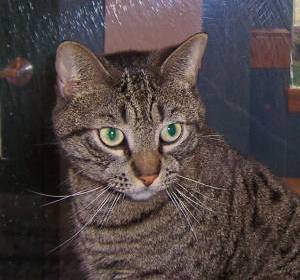

In [2]:
# Localizar o caminho da primeira imagem de gato na pasta treinamento
tf.keras.preprocessing.image.load_img('caes-e-gatos/treinamento/gato/cat.1.jpg')

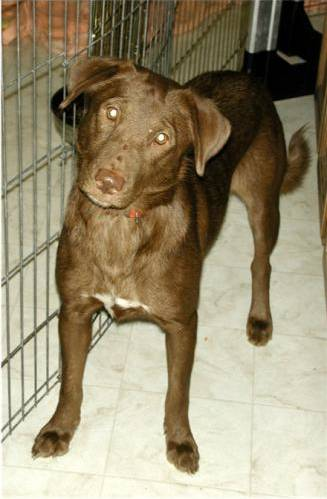

In [3]:
# Localizar o caminho da primeira imagem de cão na pasta treinamento
tf.keras.preprocessing.image.load_img('caes-e-gatos/treinamento/cao/dog.1.jpg')

In [4]:
# Localizar as 4000 imagens, nas duas classes para a base de treinamento
gerador_treinamento = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)
dataset_treinamento = gerador_treinamento.flow_from_directory('caes-e-gatos/treinamento',
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'categorical',
                                                        shuffle = True)

Found 4000 images belonging to 2 classes.


In [5]:
# Estabelecendo índices para as classes no treinamento 0: cão e 1: gato
dataset_treinamento.class_indices

{'cao': 0, 'gato': 1}

In [6]:
# Localizar o campinho para a paste de teste, contendo 1000 imagens com as duas classes
gerador_teste = ImageDataGenerator(rescale=1./255)
dataset_teste = gerador_teste.flow_from_directory('caes-e-gatos/teste',
                                                     target_size = (64, 64),
                                                     batch_size = 1,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 1000 images belonging to 2 classes.


Construção e treinamento da rede neural

In [7]:
# Criando cada camada da rede neural, conforme o modelo sequencial da rede neural convolucional
network = Sequential()
network.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32, (3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(units = 3137, activation='relu'))
network.add(Dense(units = 3137, activation='relu'))
network.add(Dense(units = 2, activation='softmax'))

In [8]:
# Visualizando o modelo com as classes criadas
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 3137)              1

In [9]:
# Estabelecendo as taxas de perda e acurácia para o modelo
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [10]:
# Treinando o modelo com 10 épocas de treinamento
# OBSERVAÇÃO: esta execução pode demorar conforme o desempenho de sua máquina
historico = network.fit(dataset_treinamento, epochs=10)

Epoch 1/10
125/125 [==============================] - 6s 46ms/step - loss: 0.7552 - accuracy: 0.5460
Epoch 2/10
125/125 [==============================] - 6s 45ms/step - loss: 0.6536 - accuracy: 0.6210
Epoch 3/10
125/125 [==============================] - 6s 46ms/step - loss: 0.6284 - accuracy: 0.6495
Epoch 4/10
125/125 [==============================] - 6s 46ms/step - loss: 0.5871 - accuracy: 0.6823
Epoch 5/10
125/125 [==============================] - 6s 46ms/step - loss: 0.5724 - accuracy: 0.6970
Epoch 6/10
125/125 [==============================] - 6s 44ms/step - loss: 0.5351 - accuracy: 0.7280
Epoch 7/10
125/125 [==============================] - 6s 44ms/step - loss: 0.5218 - accuracy: 0.7495
Epoch 8/10
125/125 [==============================] - 6s 45ms/step - loss: 0.4998 - accuracy: 0.7635
Epoch 9/10
125/125 [==============================] - 6s 45ms/step - loss: 0.4909 - accuracy: 0.7568
Epoch 10/10
125/125 [==============================] - 6s 45ms/step - loss: 0.4775 - accura

Avaliação da rede neural

In [11]:
# Estabelecendo índices para as classes no teste 0: cão e 1: gato
dataset_teste.class_indices

{'cao': 0, 'gato': 1}

In [12]:
# Trazendo ao modelo as predições do treinamento
previsoes = network.predict(dataset_teste)

1000/1000 [==============================] - 2s 2ms/step


In [13]:
# Verificando a máxima previsão para as classes
previsoes = np.argmax(previsoes, axis = 1)

In [14]:
# Demonstrando a acurácia do modelo treinado
from sklearn.metrics import accuracy_score
accuracy_score(dataset_teste.classes, previsoes)

0.707

OBSERVAÇÃO: o valor demonstrado acima é a precisão do treinamento do modelo. Valores quanto mais próximos de 1, mais precisa será a classificação. Para aumentar a precisão, pode-se retreinar o modelo ou ainda inserir mais imagens para o treinamento.

In [15]:
# Atribuindo as classes ao modelo treinado
dataset_teste.class_indices

{'cao': 0, 'gato': 1}

In [16]:
# Estabelecendo a matriz de confusão para confronto do dados entre as classes
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(dataset_teste.classes, previsoes)

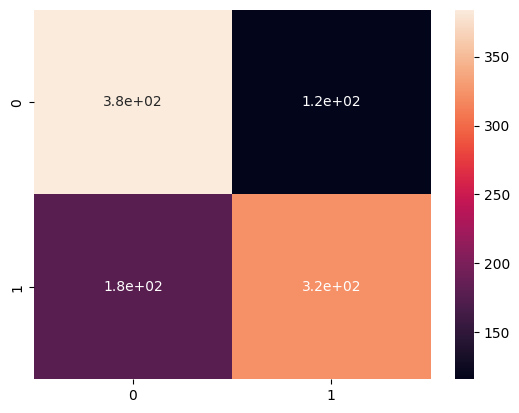

In [17]:
# Demonstrando a matriz de confusão
sns.heatmap(cm, annot=True);

In [18]:
# Classificando os dados obtidos
from sklearn.metrics import classification_report
print(classification_report(dataset_teste.classes, previsoes))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72       500
           1       0.74      0.65      0.69       500

    accuracy                           0.71      1000
   macro avg       0.71      0.71      0.71      1000
weighted avg       0.71      0.71      0.71      1000



Salvar e carregar a rede neural

In [19]:
# Gerando um arquivo .json com os dados do modelo
model_json = network.to_json()
with open('network.json','w') as json_file:
  json_file.write(model_json)

In [20]:
# Criando o arquivo de pesos (pesos.hdf5) do treinamento
from keras.models import save_model
network_saved = save_model(network, 'pesos.hdf5')

In [21]:
# Visualizando os dados salvos no arquivo .json
with open('network.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "padding": "valid", "strides": [2, 2], "d

In [22]:
# Atribuindo o treinamento ao modelo
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('pesos.hdf5')
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [23]:
# Visualizando o modelo de rede neural
network_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 3137)              1

Classificação de uma única imagem

In [24]:
# Na pasta teste, localize qualquer imagem para a classificação, conforme o modelo treinado
imagem = cv2.imread('caes-e-gatos/teste/gato/cat.3500.jpg')
#imagem = cv2.imread('caes-e-gatos/teste/cao/dog.3501.jpg')
cv2.imshow("1",imagem)
cv2.waitKey() # comando que aguarda o fechamento das janelas com a imagem

-1

In [25]:
# Redimensionando a imagem em 64x64 pixels
imagem = cv2.resize(imagem, (64, 64))
cv2.imshow('2',imagem)
cv2.waitKey() # comando que aguarda o fechamento das janelas com a imagem

-1

In [26]:
# Convertendo em escala de cinza
imagem = imagem / 255

In [27]:
# Parâmetros da imagem redimensionada
imagem = imagem.reshape(-1, 64, 64, 3)
imagem.shape

(1, 64, 64, 3)

In [28]:
resultado = network_loaded(imagem)
resultado

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.26713645, 0.7328636 ]], dtype=float32)>

In [29]:
# Demonstrando a classe que obteve o maior resultado
resultado = np.argmax(resultado)
resultado

1

In [30]:
# Verificando as classes do modelo
dataset_teste.class_indices

{'cao': 0, 'gato': 1}

In [31]:
# Categorizando o resultado
if resultado == 0:
  print('Cão')
else:
  print('Gato')

Gato
